In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm
%matplotlib inline 

In [70]:
gdp_df=pd.read_csv("../data/gdp_per_capita.csv", skipfooter=2)
gdp_df.tail(n=10)

<ipython-input-70-c24bf885f462>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df=pd.read_csv("../data/gdp_per_capita.csv", skipfooter=2)


,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [71]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   int64  
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 210.4+ KB


In [73]:
gdp_df.drop(["Value Footnotes"], axis=1, inplace=True)

In [74]:
gdp_df.rename(columns={"Country or Area":"Country", "Value":"GDP_Per_Capita"}, inplace=True)

In [75]:
gdp_df.shape

(6729, 3)

- It has rows=6731 and column=3
- column 'year' should be in date format. also we need to remove extra footnote rows to convert Year inte date format.

- year reprsented from 1990-2018

In [76]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


gdp_df.drop( gdp_df[ (gdp_df['Year'] == 'Footnote') ].index , inplace=True)
gdp_df.drop(gdp_df[gdp_df['Year'] =='Excludes South Sudan after July 9, 2011.'].index, inplace=True)

gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], infer_datetime_format=True)

gdp_df.dtypes

In [77]:
gdp_df.describe(include='all')


,Country,Year,GDP_Per_Capita
count,6729,6729.000000,6729.000000
unique,243,NaN,NaN
top,Gabon,NaN,NaN
freq,29,NaN,NaN
mean,NaN,2004.293357,15468.017091
std,NaN,8.269834,17995.866104
min,NaN,1990.000000,438.643111
25%,NaN,1997.000000,3170.407545
50%,NaN,2004.000000,8959.240204
75%,NaN,2011.000000,20940.081023


In [78]:
gdp_df["Year"].value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

In [81]:
gdp_2014=gdp_df[gdp_df["Year"]==2014]


In [83]:
gdp_2014

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555
...,...,...,...
6592,West Bank and Gaza,2014,4445.307470
6617,World,2014,14514.392218
6646,Yemen,2014,3828.484887
6675,Zambia,2014,3684.685507


In [84]:
gdp_2014.describe(include='all')

,Country,Year,GDP_Per_Capita
count,240,240.0,240.000000
unique,240,NaN,NaN
top,Gabon,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2014.0,18034.303556
std,NaN,0.0,19320.930599
min,NaN,2014.0,672.681648
25%,NaN,2014.0,4301.187365
50%,NaN,2014.0,11868.067810
75%,NaN,2014.0,24388.408410


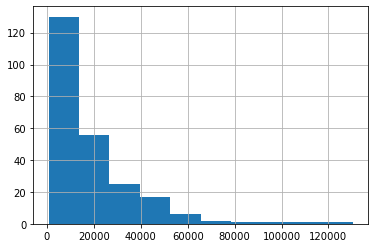

In [105]:
gdp_2014['GDP_Per_Capita'].hist()

plt.hist(gdp_2014["GDP_Per_Capita"])

In [86]:
gdp_2014.sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


In [87]:
gdp_2014.head(n=5)

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


In [88]:
gdp_2014.tail(n=5)

,Country,Year,GDP_Per_Capita
6592,West Bank and Gaza,2014,4445.307470
6617,World,2014,14514.392218
6646,Yemen,2014,3828.484887
6675,Zambia,2014,3684.685507
6704,Zimbabwe,2014,2506.490220


In [89]:
gdp_pivoted=gdp_df.pivot(index='Country', columns='Year', values='GDP_Per_Capita')

In [91]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,3236.196368,3314.761163,3208.119899,3517.569954,3920.320010,4137.843864,...,3816.165070,4019.485067,4405.778573,4568.509070,4559.032259,4445.307470,4493.612080,4600.685400,4651.723645,4576.432497
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,12726.100963,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4359.812628,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504


In [97]:
gdp_pivoted=gdp_pivoted[[1990, 2017]].dropna()

#gdp_pivoted.drop(
    
#gdp_pivoted[ 
        #(gdp_pivoted['1990-01-01'].notnull()) & (gdp_pivoted['2017-01-01'].notnull())
    #]#.index
#)

gdp_pivoted[[1990-01-01,2017-01-01]]


In [95]:
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
...,...,...
Vietnam,1457.594613,6233.485045
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [110]:
gdp_pivoted['Percent_Change']=100*((gdp_pivoted[2017]- gdp_pivoted[1990])/gdp_pivoted[1990])

In [112]:
gdp_pivoted.tail()

Year,1990,2017,Percent_Change
Country,,,
Vietnam,1457.594613,6233.485045,327.655604
World,8966.014072,15527.280228,73.179298
Yemen,3425.707169,2404.422370,-29.812379
Zambia,2339.137959,3717.667166,58.933215
Zimbabwe,2819.549467,2568.410072,-8.907075


In [113]:
pd.value_counts(gdp_pivoted['Percent_Change']<0)

False    189
True      20
Name: Percent_Change, dtype: int64

20 countries have negative growth.

Equatorial Guinea	 had the highest percapita GDP change


In [120]:
gdp_pivoted.sort_values(by='Percent_Change')

Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1386.933242,807.752905,-41.759785
United Arab Emirates,112349.597967,66477.818719,-40.829500
Burundi,1027.396660,670.777072,-34.710993
Yemen,3425.707169,2404.422370,-29.812379
Ukraine,10463.959955,7906.540301,-24.440266
...,...,...,...
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
Myanmar,730.228038,5610.324700,668.297629


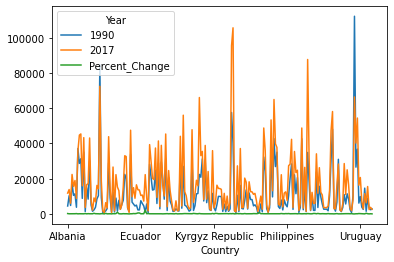

In [121]:
lines = gdp_pivoted.plot.line()